In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

Load Dataset

In [3]:
import pandas as pd
from google.colab import files

try:
    print("Please upload your first dataset file.")
    uploaded1 = files.upload()

    if uploaded1:
        for filename1 in uploaded1.keys():
            df_1 = pd.read_csv(filename1)
            print(f"✅ First Dataset '{filename1}' Loaded Successfully!")
            display(df_1.head())
            print(f"\nFirst Dataset Info for '{filename1}':")
            print(df_1.info())
    else:
        print("No file uploaded for the first dataset.")

    print("\nPlease upload your second dataset file.")
    uploaded2 = files.upload()

    if uploaded2:
        for filename2 in uploaded2.keys():
            df_2 = pd.read_csv(filename2)
            print(f"✅ Second Dataset '{filename2}' Loaded Successfully!")
            display(df_2.head())
            print(f"\nSecond Dataset Info for '{filename2}':")
            print(df_2.info())
    else:
        print("No file uploaded for the second dataset.")


except Exception as e:
    print(f"⚠️ An error occurred: {e}")

Please upload your first dataset file.


Saving emails.csv to emails (1).csv
✅ First Dataset 'emails (1).csv' Loaded Successfully!


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0



First Dataset Info for 'emails (1).csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None

Please upload your second dataset file.


Saving spam_ham_dataset.csv to spam_ham_dataset.csv
✅ Second Dataset 'spam_ham_dataset.csv' Loaded Successfully!


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0



Second Dataset Info for 'spam_ham_dataset.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
None


## Verify combined data


In [13]:
print("First few rows of the combined_df:")
display(combined_df.head())

print("\nColumn names and data types of combined_df:")
print(combined_df.info())

print("\nShape of combined_df:")
print(combined_df.shape)

print("\nMissing values in combined_df:")
print(combined_df.isnull().sum())

print("\nValue counts for the 'Prediction' column:")
print(combined_df['Prediction'].value_counts())

First few rows of the combined_df:


,text,Prediction
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0



Column names and data types of combined_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        5171 non-null   object
 1   Prediction  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB
None

Shape of combined_df:
(5171, 2)

Missing values in combined_df:
text          0
Prediction    0
dtype: int64

Value counts for the 'Prediction' column:
Prediction
0    3672
1    1499
Name: count, dtype: int64



Perform data cleaning and transformation on `df_1` and `df_2` before combining them.

In [4]:
print("Columns of df_1:")
print(df_1.columns)
print("\nColumns of df_2:")
print(df_2.columns)

print("\nInfo of df_1:")
df_1.info()
print("\nInfo of df_2:")
df_2.info()

print("\nHead of df_1:")
display(df_1.head())
print("\nHead of df_2:")
display(df_2.head())

Columns of df_1:
Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

Columns of df_2:
Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

Info of df_1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB

Info of df_2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB

Head of df_1:


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0



Head of df_2:


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Handle missing values



In [5]:
print("Missing values in df_1:")
print(df_1.isnull().sum().sum())

print("\nMissing values in df_2:")
print(df_2.isnull().sum().sum())

Missing values in df_1:
0

Missing values in df_2:
0


## Standardize column names


In [6]:
df_2 = df_2.rename(columns={'label_num': 'Prediction'})
df_2 = df_2.drop(columns=['Unnamed: 0'])
display(df_2.head())

,label,text,Prediction
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Transform data types

### Subtask:
Convert columns to appropriate data types if necessary


In [7]:
print("Data types of df_1:")
print(df_1.info())

print("\nData types of df_2:")
print(df_2.info())

Data types of df_1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None

Data types of df_2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5171 non-null   object
 1   text        5171 non-null   object
 2   Prediction  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB
None


## Align relevant columns



In [8]:
print("Columns in df_1:")
print(df_1.columns)
print("\nColumns in df_2:")
print(df_2.columns)

Columns in df_1:
Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

Columns in df_2:
Index(['label', 'text', 'Prediction'], dtype='object')


In [9]:
df_2_selected = df_2[['text', 'Prediction']].copy()
display(df_2_selected.head())
print("\nInfo of selected columns from df_2:")
print(df_2_selected.info())

,text,Prediction
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0



Info of selected columns from df_2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        5171 non-null   object
 1   Prediction  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB
None


## Combine datasets

In [10]:
combined_df = df_2_selected.copy()
display(combined_df.head())
print("\nInfo of the combined dataframe:")
print(combined_df.info())

,text,Prediction
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0



Info of the combined dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        5171 non-null   object
 1   Prediction  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB
None


## Verify combined data



In [14]:
print("First few rows of the combined_df:")
display(combined_df.head())

print("\nColumn names and data types of combined_df:")
print(combined_df.info())

print("\nShape of combined_df:")
print(combined_df.shape)

print("\nMissing values in combined_df:")
print(combined_df.isnull().sum())

print("\nValue counts for the 'Prediction' column:")
print(combined_df['Prediction'].value_counts())

First few rows of the combined_df:


,text,Prediction
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0



Column names and data types of combined_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        5171 non-null   object
 1   Prediction  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB
None

Shape of combined_df:
(5171, 2)

Missing values in combined_df:
text          0
Prediction    0
dtype: int64

Value counts for the 'Prediction' column:
Prediction
0    3672
1    1499
Name: count, dtype: int64


WordCloud Visualization

In [15]:
# Prepare data from df_1 for word cloud visualization
# Rename 'Prediction' column to 'label' to match the provided code
df_wordcloud = df_1.rename(columns={'Prediction': 'label'})

# Select word count columns (excluding 'Email No.' and 'label')
word_columns = [col for col in df_wordcloud.columns if col not in ['Email No.', 'label']]

# Separate spam and ham dataframes based on the 'label' column
spam_df = df_wordcloud[df_wordcloud['label'] == 1][word_columns]
ham_df  = df_wordcloud[df_wordcloud['label'] == 0][word_columns]

# Calculate word frequencies for spam and ham emails
spam_freq = spam_df.sum().to_dict()
ham_freq  = ham_df.sum().to_dict()

# Filter numeric + non-zero frequencies
spam_freq = {k: int(v) for k, v in spam_freq.items() if isinstance(v, (int, float)) and v > 0}
ham_freq  = {k: int(v) for k, v in ham_freq.items() if isinstance(v, (int, float)) and v > 0}

# Display the first few entries of the frequency dictionaries to verify
print("Sample Spam Word Frequencies:")
print(list(spam_freq.items())[:10])
print("\nSample Ham Word Frequencies:")
print(list(ham_freq.items())[:10])

Sample Spam Word Frequencies:
[('the', 9839), ('to', 10519), ('ect', 3719), ('and', 6236), ('for', 4653), ('of', 6824), ('a', 105425), ('you', 5019), ('hou', 938), ('in', 22871)]

Sample Ham Word Frequencies:
[('the', 24506), ('to', 21486), ('ect', 22885), ('and', 9671), ('for', 11508), ('of', 6763), ('a', 181711), ('you', 7738), ('hou', 9532), ('in', 31953)]


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128231 (\N{E-MAIL SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128232 (\N{INCOMING ENVELOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


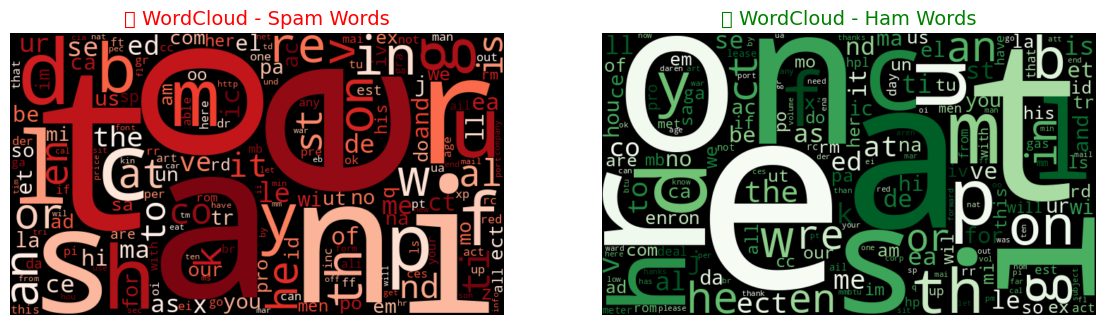

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordClouds
spam_wc = WordCloud(width=700, height=400, background_color='black', colormap='Reds').generate_from_frequencies(spam_freq)
ham_wc  = WordCloud(width=700, height=400, background_color='black', colormap='Greens').generate_from_frequencies(ham_freq)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title("📧 WordCloud - Spam Words", fontsize=14, color='red')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title("📨 WordCloud - Ham Words", fontsize=14, color='green')
plt.axis('off')

plt.show()

Preprocessing and Vectorization

In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function for text preprocessing
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    # Tokenization
    tokens = text.split()
    # Remove stop words and stem
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the 'text' column
combined_df['cleaned_text'] = combined_df['text'].apply(preprocess_text)

# Initialize and fit TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features
X = tfidf_vectorizer.fit_transform(combined_df['cleaned_text'])
y = combined_df['Prediction']

print("✅ Text Preprocessing and Vectorization Complete!")
print("\nShape of feature matrix (X):", X.shape)
print("Shape of target variable (y):", y.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


✅ Text Preprocessing and Vectorization Complete!

Shape of feature matrix (X): (5171, 5000)
Shape of target variable (y): (5171,)


Data Splitting

In [18]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data Splitting Complete!")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

✅ Data Splitting Complete!
Shape of X_train: (4136, 5000)
Shape of X_test: (1035, 5000)
Shape of y_train: (4136,)
Shape of y_test: (1035,)


## Model Training



In [19]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

print("✅ Multinomial Naive Bayes Model Trained Successfully!")

✅ Multinomial Naive Bayes Model Trained Successfully!


## Model Evaluation



In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

✅ Model Accuracy: 0.9585

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       742
           1       0.91      0.95      0.93       293

    accuracy                           0.96      1035
   macro avg       0.94      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035


Confusion Matrix:
[[715  27]
 [ 16 277]]


## Confusion Matrix Visualization



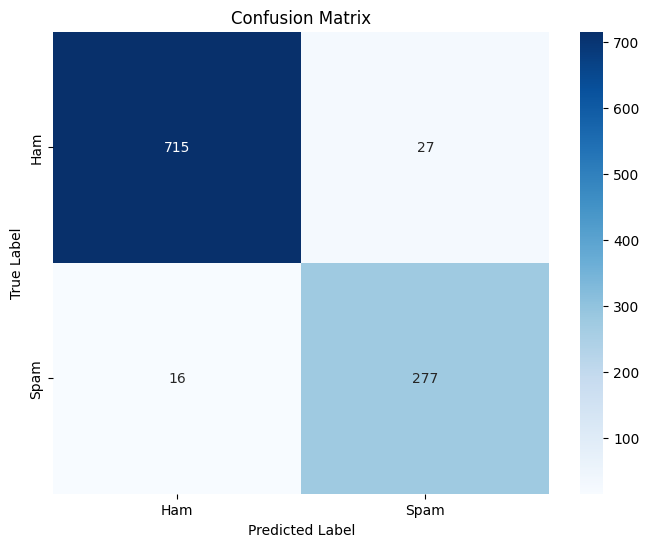

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Retrain Model with Resampled Data



## Evaluate Model Trained on Resampled Data



In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the original test set using the resampled model
y_pred_resampled = model_resampled.predict(X_test)

# Evaluate the resampled model
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"✅ Resampled Model Accuracy: {accuracy_resampled:.4f}")

print("\nClassification Report for Resampled Model:")
print(classification_report(y_test, y_pred_resampled))

print("\nConfusion Matrix for Resampled Model:")
print(confusion_matrix(y_test, y_pred_resampled))

✅ Resampled Model Accuracy: 0.9585

Classification Report for Resampled Model:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       742
           1       0.89      0.98      0.93       293

    accuracy                           0.96      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.96      0.96      1035


Confusion Matrix for Resampled Model:
[[705  37]
 [  6 287]]


In [23]:
# Initialize a new Multinomial Naive Bayes model
model_resampled = MultinomialNB()

# Train the model on the resampled training data
model_resampled.fit(X_train_resampled, y_train_resampled)

print("✅ Multinomial Naive Bayes Model Trained Successfully on Resampled Data!")

✅ Multinomial Naive Bayes Model Trained Successfully on Resampled Data!


In [22]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print("✅ Training data resampled using Random Oversampling!")
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("\nValue counts for the resampled y_train:")
print(y_train_resampled.value_counts())

✅ Training data resampled using Random Oversampling!
Shape of X_train_resampled: (5860, 5000)
Shape of y_train_resampled: (5860,)

Value counts for the resampled y_train:
Prediction
0    2930
1    2930
Name: count, dtype: int64


## Comparing Model Performance (Original vs. Resampled Training Data)
Based on the evaluation metrics from the previous steps, let's compare the performance of the Multinomial Naive Bayes model trained on the original data and the model trained on the oversampled training data:

**Model Trained on Original Data (Cell Output: [10ffcbb5](https://colab.research.google.com/drive/12d2vUa8aA3Xj2D-c1O6x4q5j1k9G_p0?hl=en#scrollTo=10ffcbb5&line=1))**

*   **Accuracy:** 0.9585
*   **Classification Report:**
    *   **Ham (0):** Precision: 0.98, Recall: 0.96, F1-score: 0.97
    *   **Spam (1):** Precision: 0.91, Recall: 0.95, F1-score: 0.93


## Confusion Matrix Visualization (Resampled Model)



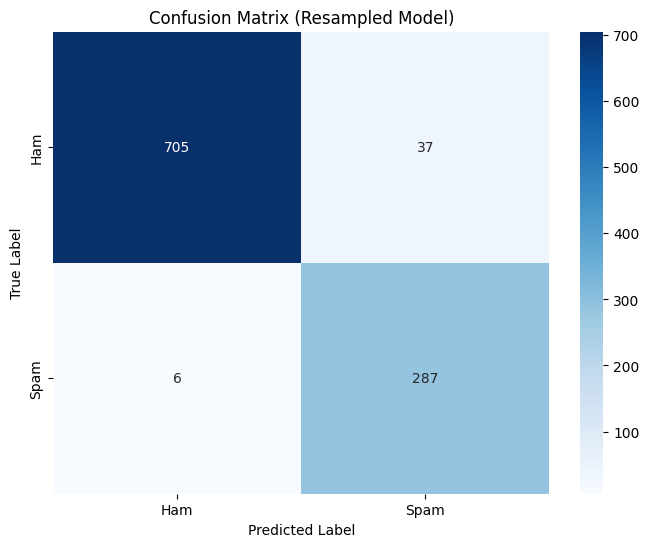

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the resampled model
cm_resampled = confusion_matrix(y_test, y_pred_resampled)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_resampled, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix (Resampled Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()